In [1]:
import cv2
import mlrose
import numpy as np
import matplotlib
import json

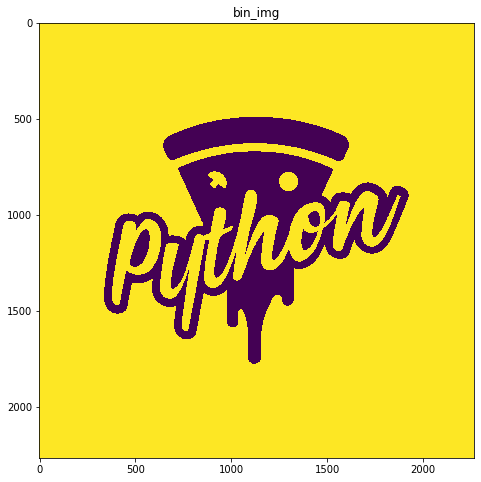

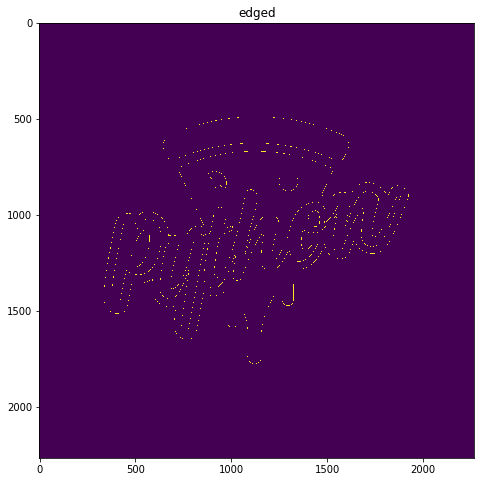

In [30]:
#### RESIING
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
	# initialize the dimensions of the image to be resized and
	# grab the image size
	dim = None
	(h, w) = image.shape[:2]

	# if both the width and height are None, then return the
	# original image
	if width is None and height is None:
		return image

	# check to see if the width is None
	if width is None:
		# calculate the ratio of the height and construct the
		# dimensions
		r = height / float(h)
		dim = (int(w * r), height)

	# otherwise, the height is None
	else:
		# calculate the ratio of the width and construct the
		# dimensions
		r = width / float(w)
		dim = (width, int(h * r))

	# resize the image
	resized = cv2.resize(image, dim, interpolation = inter)

	# return the resized image
	return resized
	
	
#### CANNY STUFF
# image = cv2.imread("elephant.png")
# print(image.shape)
# image = cv2.resize(image,(360,480))
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# # display_img(gray)
# _,bin_img = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
# # display_img(bin_img)
# edged = cv2.Canny(bin_img, 50, 100)
# plt.figure(figsize=[16,8])
# plt.imshow(edged)
# plt.title('my picture')
# plt.show()

image = cv2.imread("python_pizza_logo.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# display_img(gray)
_,bin_img = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
plt.figure(figsize=[16,8])
plt.imshow(bin_img)
plt.title('bin_img')
plt.show()
edged = cv2.Canny(bin_img, 50, 200)
plt.figure(figsize=[16,8])
plt.imshow(edged)
plt.title('edged')
plt.show()

In [31]:
matplotlib.image.imsave('pizza_processed.png', edged)

convert to svg: https://www.pngtosvg.com/


convert to points: https://shinao.github.io/PathToPoints/

and regex replace:

regex - 
* (.+)  
* [$1],  
  
Save in python variable in points.py file  

In [2]:
from points import points

In [3]:
print(np.min([e[0] for e in points]))
print(np.max([e[0] for e in points]))
print(np.min([e[1] for e in points]))
print(np.max([e[1] for e in points]))

10.57403448254615
400.0
24.82781521642953
754.7170000000001


In [185]:
test = points_filtered[:-1] - points_filtered[1:]
print(np.min(test[:,0]))
print(np.max(test[:,0]))
print(np.min(test[:,1]))
print(np.max(test[:,1]))

-171.18040674631294
171.02456605213877
-31.67496326503401
1.0188888845219992


In [184]:
points_filtered = []
for e in points:
    if (int(e[0]) != 0) and (int(e[0]) != 400) and (int(e[1]) != 0) and (int(e[1]) != 400):
        points_filtered.append(e)
points_filtered = np.array(points_filtered)        

In [176]:
# IT DOESN'T WORK! Lines are STIL THERE! ARGH
distances = []
for i in range(len(points_filtered)-1):
    distances.append(np.sqrt((points_filtered[i+1,0] - points_filtered[i,0])**2 + (points_filtered[i+1,1] - points_filtered[i,1])**2))
distances[:3]  
distances = np.array(distances)

ixs = np.where(distances > 1.5)[0] # 6 manually tested to not remove olives :D
print(ixs)
ixs_distances = ixs[1:] - ixs[:-1]
print(ixs_distances)

wrong_pairs = zip(ixs[np.where(ixs_distances < 60)[0]],ixs[np.where(ixs_distances < 60)[0]+1])
wrong_pairs = ([[e1,e2] for e1,e2 in wrong_pairs])
print(wrong_pairs)

del_ixs = []
for elem in wrong_pairs:
    del_ixs.extend(list(range(elem[0], elem[1]+1)))
del_ixs = list(set(del_ixs))

points_filtered2 = np.delete(points_filtered, del_ixs, axis=0)


[ 380  758 1661 1720 1778 1834 1888 2320 2959 3442 3972 4014 4054 4512
 4661 4887 5112 5226 5311 5394 5693 6173 6263]
[378 903  59  58  56  54 432 639 483 530  42  40 458 149 226 225 114  85
  83 299 480  90]
[[1661, 1720], [1720, 1778], [1778, 1834], [1834, 1888], [3972, 4014], [4014, 4054]]


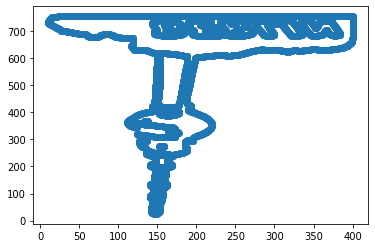

In [4]:
plt.scatter([e[0] for e in points], [e[1] for e in points]);

In [6]:
e = []
for elem in points:
    e.append({'x':elem[0], 'y':elem[1]})

e = f'let drawing = {e}'    

with open('tower_sorted2.js', 'w') as outfile:
    json.dump(e, outfile)
    
# open file and remove string quotes  

In [243]:
points_2 = [complex(e[0], e[1]) for e in points_filtered]
f = np.fft.fft(points_2)
f_splitted = np.array([[elem.real, elem.imag] for elem in f])
# f_splitted[:,0] = np.abs(f_splitted[:,0])

In [247]:
np.savetxt('data.csv', f_splitted, delimiter=',')

In [244]:
f_splitted_test = [complex(elem[0], elem[1]) for elem in f_splitted]

In [245]:
ifft_ = np.fft.ifft(f_splitted_test)

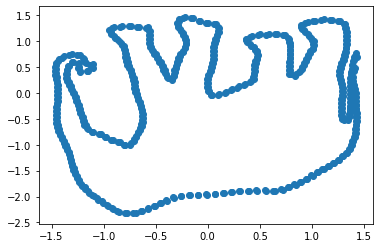

In [246]:
plt.scatter(ifft_[:].real, ifft_[:].imag)